In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../../TestData/cleaned_asteroid_data.csv')

data


,neo,pha,H,e,a,q,i,om,w,ma,ad,n,tp,per,per_y,moid,class,rms
0,0,0,3.400,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,1683.145703,4.608202,1.594780,MBA,0.43301
1,0,0,4.200,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,1687.410992,4.619880,1.234290,MBA,0.35936
2,0,0,5.330,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,1592.013769,4.358696,1.034290,MBA,0.33848
3,0,0,3.000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,1325.432763,3.628837,1.139480,MBA,0.39980
4,0,0,6.900,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,1508.414421,4.129814,1.095750,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958514,0,0,17.135,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1258.191614,3.444741,0.861979,MBA,0.23839
958515,0,0,18.500,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,1303.177916,3.567907,0.671242,MBA,0.53633
958516,1,1,20.400,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,1727.085364,4.728502,0.035589,APO,0.51556
958517,0,0,18.071,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1335.311579,3.655884,0.893896,MBA,0.25641


In [6]:
random_samples = data.sample(n=20000, random_state=33)

print(random_samples['class'].value_counts())

class
MBA    17823
OMB      584
MCA      426
IMB      425
APO      269
TJN      180
AMO      164
TNO       72
ATE       37
CEN       19
IEO        1
Name: count, dtype: int64


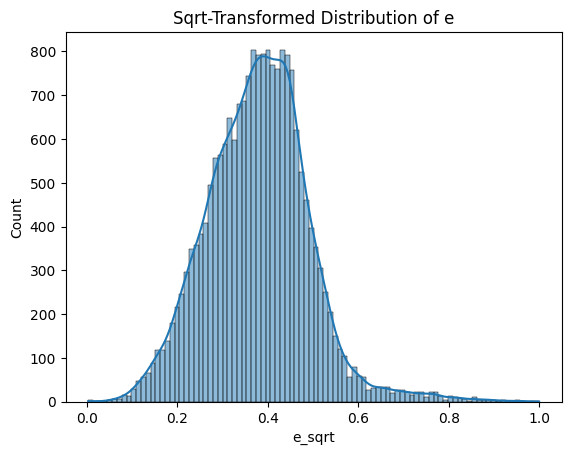

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

random_samples['e_sqrt'] = np.sqrt(random_samples['e'])
sns.histplot(random_samples['e_sqrt'], kde=True)
plt.title("Sqrt-Transformed Distribution of e")
plt.show()

In [ ]:
random_samples.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 269633 to 321209
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   neo     20000 non-null  int64  
 1   pha     20000 non-null  int64  
 2   H       20000 non-null  float64
 3   a       20000 non-null  float64
 4   q       20000 non-null  float64
 5   i       20000 non-null  float64
 6   om      20000 non-null  float64
 7   w       20000 non-null  float64
 8   ma      20000 non-null  float64
 9   ad      20000 non-null  float64
 10  n       20000 non-null  float64
 11  tp      20000 non-null  float64
 12  per     20000 non-null  float64
 13  per_y   20000 non-null  float64
 14  moid    20000 non-null  float64
 15  class   20000 non-null  object 
 16  rms     20000 non-null  float64
 17  e_sqrt  20000 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory usage: 2.9+ MB


In [21]:
classes_to_drop = ['CEN', 'AST', 'IEO', 'ATE']
df_filtered = random_samples[~random_samples['class'].isin(classes_to_drop)]

randomtest = df_filtered

In [ ]:
X = randomtest.drop('class', axis=1)
y = randomtest['class']


<class 'pandas.core.series.Series'>
Index: 19943 entries, 269633 to 321209
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
19943 non-null  object
dtypes: object(1)
memory usage: 311.6+ KB


In [25]:
X.to_csv('../TestData/X_test.csv', index=False)
y.to_csv('../TestData/y_test.csv', index=False)